#Modules

In [ ]:
 pip install lazypredict

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.9 MB 29.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390960 sha256=f6dff4741f09b80be506c5fbea8c474a2d981801dcb2550ba34c243181eb91d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-brjgt7or/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6031ea78877daa345a84ca269ea55a6553c758b120bcdb8782560218a59174f2
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Succ

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Dataset

In [ ]:
df = pd.read_csv('/content/Plasma lipidomics in Alzheimers disease and its progression-1.csv')

In [ ]:
df

Sample           Diagnostic     Sex  Age  MMSE  CSF Amyloid (pg/mL)  \
0         1  Alzheimer's Disease  Female   68    26                688.0   
1         2  Alzheimer's Disease  Female   66    22                489.0   
2         3  Alzheimer's Disease  Female   72    23                509.0   
3         4  Alzheimer's Disease    Male   73    25                544.0   
4         5  Alzheimer's Disease  Female   75    15                303.0   
..      ...                  ...     ...  ...   ...                  ...   
207     208              Control  Female   74    28               1004.0   
208     209              Control  Female   76    28               1215.0   
209     210              Control  Female   67    30                470.0   
210     211              Control    Male   71    29                712.0   
211     212              Control    Male   69    22                291.0   

     CSF Total tau (pg/mL)  CSF Phosphorylated tau (pg/mL) APOE4  \
0                    369.0                           107.0   Yes   
1                    482.0                           176.0   Yes   
2                    329.0                           114.0   Yes   
3                    482.0                            80.0    No   
4                    806.0                           120.0    No   
..                     ...                             ...   ...   
207                  314.0                            58.8    No   
208                  312.0                            51.7    No   
209                   86.2                            15.6    No   
210                  463.0                            87.3    No   
211                  288.0                            45.2   NaN   

    Progression to Alzheimer's Disease  Progression time (months)  
0                                  NaN                        NaN  
1                                  NaN                        NaN  
2                                  NaN                        NaN  
3                                  NaN                        NaN  
4                                  NaN                        NaN  
..                                 ...                        ...  
207                                NaN                        NaN  
208                                NaN                        NaN  
209                                NaN                        NaN  
210                                NaN                        NaN  
211                                NaN                        NaN  

[212 rows x 11 columns]

#EDA

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isna().any()

Sample                                False
Diagnostic                            False
Sex                                   False
Age                                   False
MMSE                                  False
CSF Amyloid (pg/mL)                    True
CSF Total tau (pg/mL)                  True
CSF Phosphorylated tau (pg/mL)         True
APOE4                                  True
Progression to Alzheimer's Disease     True
Progression time (months)              True
dtype: bool

In [ ]:
df.isna().sum()

Sample                                  0
Diagnostic                              0
Sex                                     0
Age                                     0
MMSE                                    0
CSF Amyloid (pg/mL)                    14
CSF Total tau (pg/mL)                  14
CSF Phosphorylated tau (pg/mL)         14
APOE4                                   3
Progression to Alzheimer's Disease    123
Progression time (months)             165
dtype: int64

In [ ]:
df.head()

Sample           Diagnostic     Sex  Age  MMSE  CSF Amyloid (pg/mL)  \
0       1  Alzheimer's Disease  Female   68    26                688.0   
1       2  Alzheimer's Disease  Female   66    22                489.0   
2       3  Alzheimer's Disease  Female   72    23                509.0   
3       4  Alzheimer's Disease    Male   73    25                544.0   
4       5  Alzheimer's Disease  Female   75    15                303.0   

   CSF Total tau (pg/mL)  CSF Phosphorylated tau (pg/mL) APOE4  \
0                  369.0                           107.0   Yes   
1                  482.0                           176.0   Yes   
2                  329.0                           114.0   Yes   
3                  482.0                            80.0    No   
4                  806.0                           120.0    No   

  Progression to Alzheimer's Disease  Progression time (months)  
0                                NaN                        NaN  
1                                NaN                        NaN  
2                                NaN                        NaN  
3                                NaN                        NaN  
4                                NaN                        NaN

#Handling Missing Values

In [ ]:
#mapping
df['Progression to Alzheimer\'s Disease'] = df['Progression to Alzheimer\'s Disease'].map({
    'Yes': 1,
    'No': 0
})

print(df['Progression to Alzheimer\'s Disease'].value_counts())

Progression to Alzheimer's Disease
1.0    47
0.0    42
Name: count, dtype: int64


In [ ]:
import pandas as pd
def impute_progression(row):
    if pd.isna(row['Progression to Alzheimer\'s Disease']):
        if row['CSF Amyloid (pg/mL)'] > 500:
            return 1
        else:
            return 0
    else:
        return row['Progression to Alzheimer\'s Disease']
df['Progression to Alzheimer\'s Disease'] = df.apply(impute_progression, axis=1)
print(df['Progression to Alzheimer\'s Disease'].value_counts())

Progression to Alzheimer's Disease
1.0    108
0.0    104
Name: count, dtype: int64


In [ ]:
df

Sample           Diagnostic     Sex  Age  MMSE  CSF Amyloid (pg/mL)  \
0         1  Alzheimer's Disease  Female   68    26                688.0   
1         2  Alzheimer's Disease  Female   66    22                489.0   
2         3  Alzheimer's Disease  Female   72    23                509.0   
3         4  Alzheimer's Disease    Male   73    25                544.0   
4         5  Alzheimer's Disease  Female   75    15                303.0   
..      ...                  ...     ...  ...   ...                  ...   
207     208              Control  Female   74    28               1004.0   
208     209              Control  Female   76    28               1215.0   
209     210              Control  Female   67    30                470.0   
210     211              Control    Male   71    29                712.0   
211     212              Control    Male   69    22                291.0   

     CSF Total tau (pg/mL)  CSF Phosphorylated tau (pg/mL) APOE4  \
0                    369.0                           107.0   Yes   
1                    482.0                           176.0   Yes   
2                    329.0                           114.0   Yes   
3                    482.0                            80.0    No   
4                    806.0                           120.0    No   
..                     ...                             ...   ...   
207                  314.0                            58.8    No   
208                  312.0                            51.7    No   
209                   86.2                            15.6    No   
210                  463.0                            87.3    No   
211                  288.0                            45.2   NaN   

     Progression to Alzheimer's Disease  Progression time (months)  
0                                   1.0                        NaN  
1                                   0.0                        NaN  
2                                   1.0                        NaN  
3                                   1.0                        NaN  
4                                   0.0                        NaN  
..                                  ...                        ...  
207                                 1.0                        NaN  
208                                 1.0                        NaN  
209                                 0.0                        NaN  
210                                 1.0                        NaN  
211                                 0.0                        NaN  

[212 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype(str)
        df[i] = labels.fit_transform(df[i])
print(df.head())

   Sample  Diagnostic  Sex  Age  MMSE  CSF Amyloid (pg/mL)  \
0       1           0    0   68    26                688.0   
1       2           0    0   66    22                489.0   
2       3           0    0   72    23                509.0   
3       4           0    1   73    25                544.0   
4       5           0    0   75    15                303.0   

   CSF Total tau (pg/mL)  CSF Phosphorylated tau (pg/mL)  APOE4  \
0                  369.0                           107.0      1   
1                  482.0                           176.0      1   
2                  329.0                           114.0      1   
3                  482.0                            80.0      0   
4                  806.0                           120.0      0   

   Progression to Alzheimer's Disease  Progression time (months)  
0                                 1.0                        NaN  
1                                 0.0                        NaN  
2                      

In [ ]:
df.isna().sum()

Sample                                  0
Diagnostic                              0
Sex                                     0
Age                                     0
MMSE                                    0
CSF Amyloid (pg/mL)                    14
CSF Total tau (pg/mL)                  14
CSF Phosphorylated tau (pg/mL)         14
APOE4                                   0
Progression to Alzheimer's Disease      0
Progression time (months)             165
dtype: int64

In [ ]:
df['CSF Amyloid (pg/mL)'].fillna(df['CSF Amyloid (pg/mL)'].mean(), inplace=True)
df['CSF Total tau (pg/mL)'].fillna(df['CSF Total tau (pg/mL)'].mean(), inplace=True)
df['CSF Phosphorylated tau (pg/mL)'].fillna(df['CSF Phosphorylated tau (pg/mL)'].mean(), inplace=True)

#Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
X = df.drop(columns=['Progression to Alzheimer\'s Disease','Progression time (months)'])
y = df['Progression to Alzheimer\'s Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

Progression to Alzheimer's Disease
1.0    108
0.0    104
Name: count, dtype: int64

#Random Forest Classifier

In [ ]:
rfm = RandomForestClassifier(random_state=42)
rfm.fit(X_train, y_train)
rf_y_pred = rfm.predict(X_test)
print(f'RBF Accuracy: {accuracy_score(y_test, rf_y_pred)}')

RBF Accuracy: 0.8372093023255814


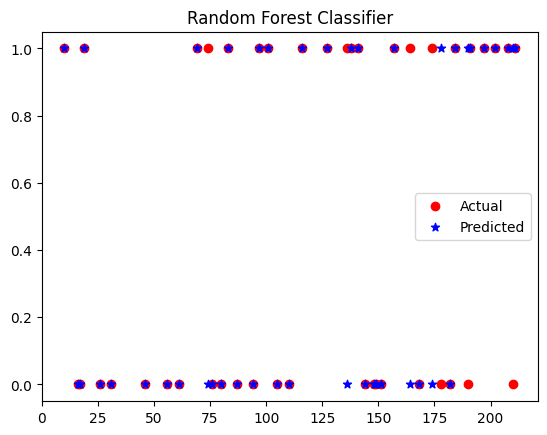

In [ ]:
plt.scatter(X_test.iloc[:,0:1],y_test , c='red',label = "Actual")
plt.scatter(X_test.iloc[:,0:1], rf_y_pred, c='blue',marker="*", label="Predicted")
plt.title("Random Forest Classifier")
plt.legend();

#Gradient Boost Classification

In [ ]:
gdb = GradientBoostingClassifier(random_state=42)
gdb.fit(X_train, y_train)
gdb_y_pred = gdb.predict(X_test)
print(f'GDB Accuracy: {accuracy_score(y_test, gdb_y_pred)}')

GDB Accuracy: 0.8837209302325582


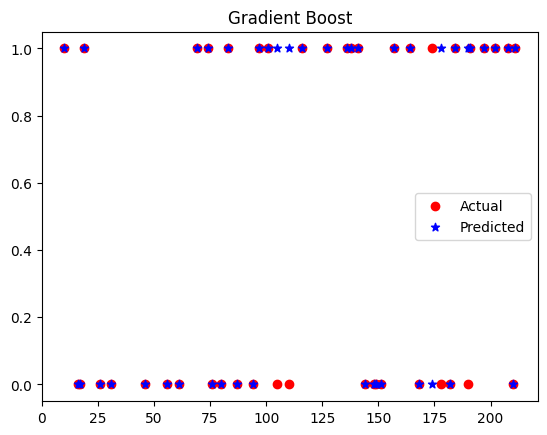

In [ ]:
plt.scatter(X_test.iloc[:,0:1],y_test , c='red',label = "Actual")
plt.scatter(X_test.iloc[:,0:1], gdb_y_pred, c='blue',marker="*", label="Predicted")
plt.title("Gradient Boost")
plt.legend();

#XGBoost


In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
print(f'XGBoost CLassifier Accuracy: {accuracy_score(y_test, xgb_y_pred)}')

XGBoost CLassifier Accuracy: 0.9069767441860465


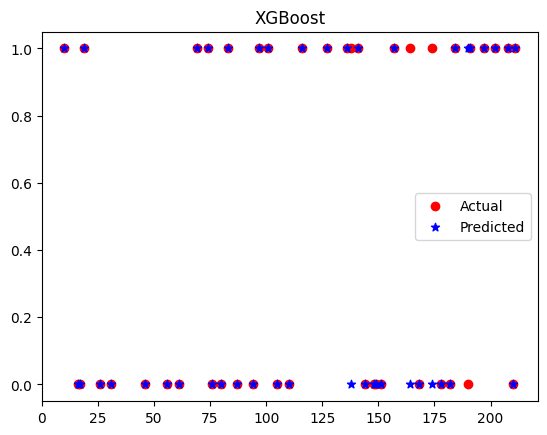

In [ ]:
plt.scatter(X_test.iloc[:,0:1],y_test , c='red', label = 'Actual')
plt.scatter(X_test.iloc[:,0:1], xgb_y_pred, c='blue',marker="*", label='Predicted')
plt.title("XGBoost")
plt.legend();

#CatBoost Classifier

In [ ]:
cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_train, y_train)
cb_y_pred = cb.predict(X_test)
print(f'CatBoost CLassifier Accuracy: {accuracy_score(y_test, cb_y_pred)}')

CatBoost CLassifier Accuracy: 0.8604651162790697


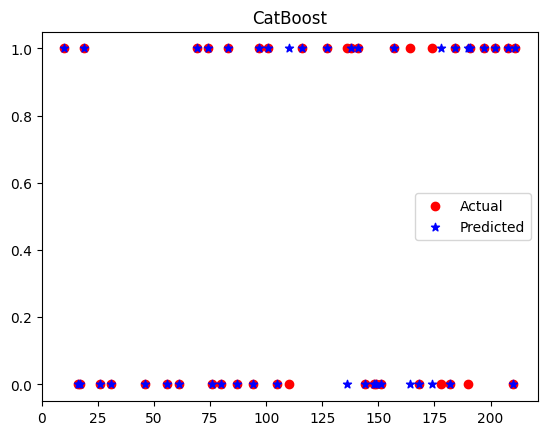

In [ ]:
plt.scatter(X_test.iloc[:,0:1],y_test , c='red', label = "Actual")
plt.scatter(X_test.iloc[:,0:1], cb_y_pred, c='blue',marker="*", label="Predicted")
plt.title("CatBoost")
plt.legend();

#Performance

In [ ]:
print(f'RBF Accuracy: {accuracy_score(y_test, rf_y_pred)}')
print(f'GDB Accuracy: {accuracy_score(y_test, gdb_y_pred)}')
print(f'XGBoost CLassifier Accuracy: {accuracy_score(y_test, xgb_y_pred)}')
print(f'CatBoost CLassifier Accuracy: {accuracy_score(y_test, cb_y_pred)}')

RBF Accuracy: 0.8372093023255814
GDB Accuracy: 0.8837209302325582
XGBoost CLassifier Accuracy: 0.9069767441860465
CatBoost CLassifier Accuracy: 0.8604651162790697


In [ ]:
print(f'RBF: {precision_score(y_test, rf_y_pred)}')
print(f'GDB: {precision_score(y_test, gdb_y_pred)}')
print(f'XGBoost: {precision_score(y_test, xgb_y_pred)}')
print(f'CatBoost: {precision_score(y_test, cb_y_pred)}')

RBF: 0.85
GDB: 0.8333333333333334
XGBoost: 0.9473684210526315
CatBoost: 0.8571428571428571


In [ ]:
print(f'RBF: {recall_score(y_test, rf_y_pred)}')
print(f'GDB: {recall_score(y_test, gdb_y_pred)}')
print(f'XGBoost: {recall_score(y_test, xgb_y_pred)}')
print(f'CatBoost: {recall_score(y_test, cb_y_pred)}')

RBF: 0.8095238095238095
GDB: 0.9523809523809523
XGBoost: 0.8571428571428571
CatBoost: 0.8571428571428571


In [ ]:
print(f'RBF: {f1_score(y_test, rf_y_pred)}')
print(f'GDB: {f1_score(y_test, gdb_y_pred)}')
print(f'XGBoost: {f1_score(y_test, xgb_y_pred)}')
print(f'CatBoost: {f1_score(y_test, cb_y_pred)}')

RBF: 0.8292682926829268
GDB: 0.8888888888888888
XGBoost: 0.9
CatBoost: 0.8571428571428571


#Lazy Predict Algorithm

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,
                     ignore_warnings=False,
                     custom_metric=None)
models, predictions = clf.fit(X_train, X_test,
                              y_train, y_test)
print(models)

 28%|██▊       | 9/32 [00:00<00:01, 22.00it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 32/32 [00:01<00:00, 30.83it/s]

SelfTrainingClassifier model failed to execute
You must pass an estimator to SelfTrainingClassifier. Use `estimator`.
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'
[LightGBM] [Info] Number of positive: 87, number of negative: 82
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 264
[LightGBM] [Info] Number of data points in the train set: 169, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514793 -> initscore=0.059189
[LightGBM] [Info] Start training from score 0.059189
[LightGBM] [Warning] No further splits with positive gain, best gain:

#Visualization

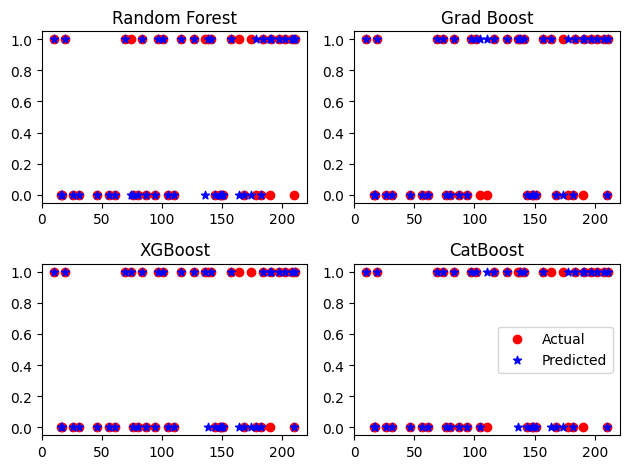

In [ ]:
figure, axis = plt.subplots(2, 2)

axis[0,0].scatter(X_test.iloc[:,0:1],y_test , c='red', label = "Actual")
axis[0,0].scatter(X_test.iloc[:,0:1], rf_y_pred, c='blue',marker="*", label="Predicted")
axis[0,0].set_title('Random Forest')

axis[0,1].scatter(X_test.iloc[:,0:1],y_test , c='red', label = "Actual")
axis[0,1].scatter(X_test.iloc[:,0:1], gdb_y_pred, c='blue',marker="*", label="Predicted")
axis[0,1].set_title('Grad Boost')

axis[1,0].scatter(X_test.iloc[:,0:1],y_test , c='red', label = "Actual")
axis[1,0].scatter(X_test.iloc[:,0:1], xgb_y_pred, c='blue',marker="*", label="Predicted")
axis[1,0].set_title('XGBoost')

axis[1,1].scatter(X_test.iloc[:,0:1],y_test , c='red', label = "Actual")
axis[1,1].scatter(X_test.iloc[:,0:1], cb_y_pred, c='blue',marker="*", label="Predicted")
axis[1,1].set_title('CatBoost')

plt.tight_layout()
plt.legend()
plt.show()

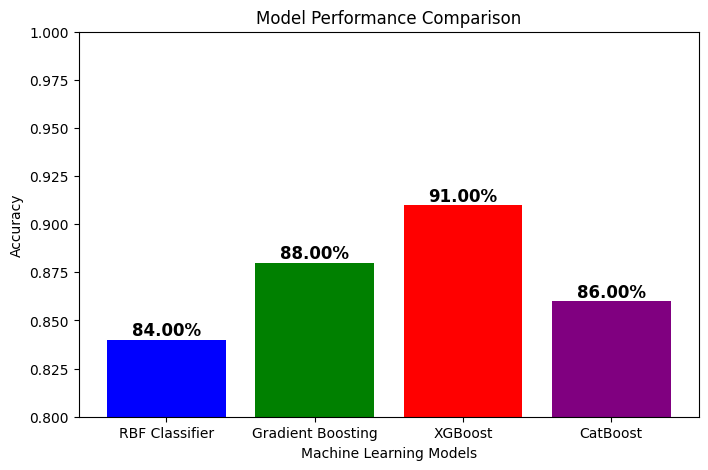

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rfac = round(accuracy_score(y_test, rf_y_pred),2)
gdbac = round(accuracy_score(y_test, gdb_y_pred),2)
xgbac = round(accuracy_score(y_test, xgb_y_pred),2)
cbac = round(accuracy_score(y_test, cb_y_pred),2)
ac_lst = [rfac,gdbac,xgbac,cbac]
models = ["RBF Classifier", "Gradient Boosting", "XGBoost", "CatBoost"]
colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(8, 5))
bars = plt.bar(models, ac_lst, color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)
plt.show()


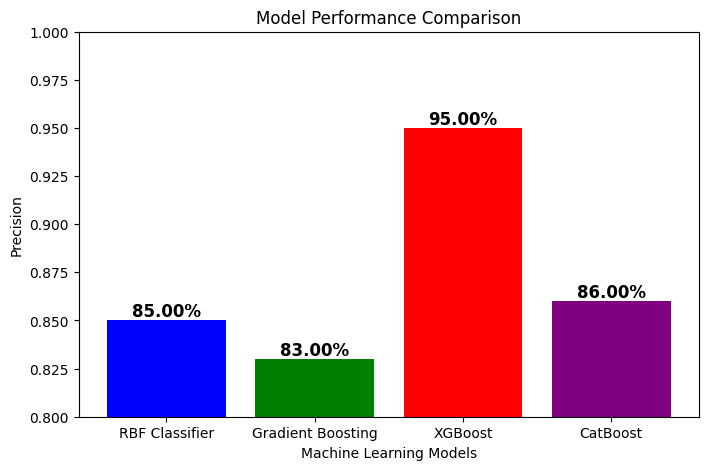

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rfpc = round(precision_score(y_test, rf_y_pred),2)
gdbpc = round(precision_score(y_test, gdb_y_pred),2)
xgbpc = round(precision_score(y_test, xgb_y_pred),2)
cbpc = round(precision_score(y_test, cb_y_pred),2)
pc_lst = [rfpc,gdbpc,xgbpc,cbpc]
models = ["RBF Classifier", "Gradient Boosting", "XGBoost", "CatBoost"]
colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(8, 5))
bars = plt.bar(models, pc_lst, color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel("Machine Learning Models")
plt.ylabel("Precision")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)
plt.show()


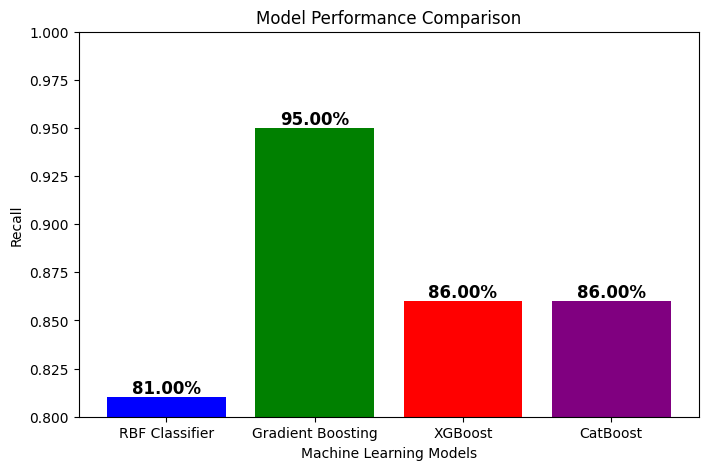

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rfrc = round(recall_score(y_test, rf_y_pred),2)
gdbrc = round(recall_score(y_test, gdb_y_pred),2)
xgbrc = round(recall_score(y_test, xgb_y_pred),2)
cbrc = round(recall_score(y_test, cb_y_pred),2)
rc_lst = [rfrc,gdbrc,xgbrc,cbrc]
models = ["RBF Classifier", "Gradient Boosting", "XGBoost", "CatBoost"]
colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(8, 5))
bars = plt.bar(models, rc_lst, color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel("Machine Learning Models")
plt.ylabel("Recall")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)
plt.show()

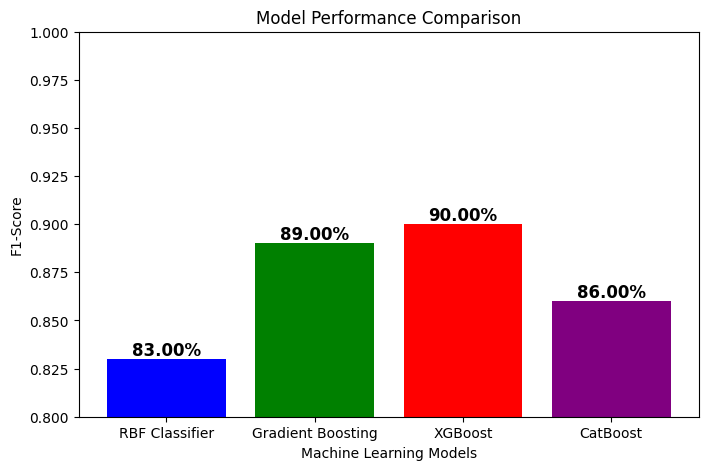

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rffc = round(f1_score(y_test, rf_y_pred),2)
gdbfc = round(f1_score(y_test, gdb_y_pred),2)
xgbfc = round(f1_score(y_test, xgb_y_pred),2)
cbfc = round(f1_score(y_test, cb_y_pred),2)
fc_lst = [rffc,gdbfc,xgbfc,cbfc]
models = ["RBF Classifier", "Gradient Boosting", "XGBoost", "CatBoost"]
colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(8, 5))
bars = plt.bar(models, fc_lst, color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel("Machine Learning Models")
plt.ylabel("F1-Score")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)
plt.show()

In [ ]:
pip install shap


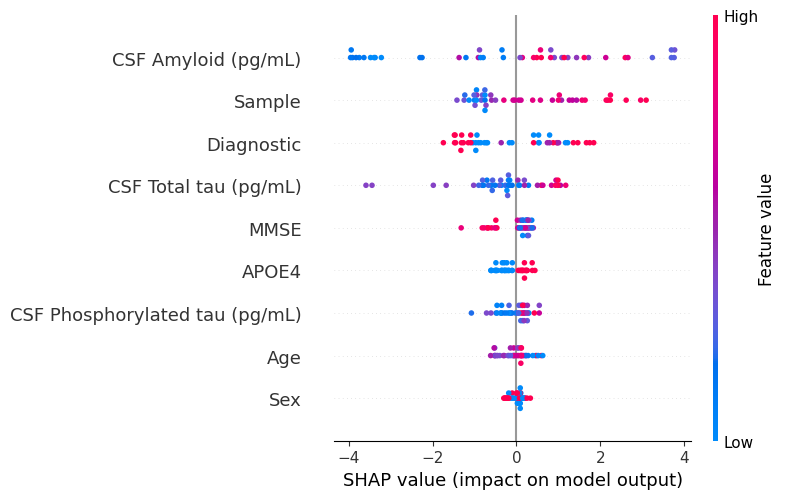

In [ ]:
import shap
# Create SHAP explainer and compute values
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)
